# Taller 2

### Nicolás Meneses Cortés - 201415808

In [161]:
%pylab inline
import scipy.integrate as spi

Populating the interactive namespace from numpy and matplotlib


###### Valores iniciales del problema

In [162]:
#Parámetros del Kart

#Variables
m =152 # masa del Kart (kg)
dp=11.0 # Dientes del piñon
dpl=39.0 # Dientes del plato

w=m*9.81 # peso del Kart (N)
rho=1.1955 # densidad del aire (kg/m^3)
dll=0.975 # Distancia entre ejes de llantas delanteras (m)
alj=0.88 # Altura con el piloto sentado en el kart (estatura 1.68 m) (m)
af=(dll*alj)/2 # Area Frontal Kart (m^2)
cd=0.89 # Coeficiente de Arrastre Kart
vw=0.0 # velocidad del viento (m/s)
rll=0.139 # Radio geométrico de las llantas en traseras (m)
r=0.98*rll # Radio efectivo llantas traseras (m)
Nc=dpl/dp # Relación de Transmisión
ef=0.95 # Eficiencia de transmisión
illd=(mbd*rlld)+(mdd*(rlld**2-rind**2))/2 # Inercia 1 llanta delantera (kg-m^2)
illt=(mbt*rll)+(mdt*(rll**2-rin**2))/2 # Inercia 1 llanta trasera (kg-m^2)
ig=((mpi*(rpi**2))/2.0)+((mpla*(rpla**2))/2.0) # Inercia de la transmisión (kg-m^2)
ieje=(meje*reje**2)/2.0 # Inercia del eje de las llantas (kg-m^2)
Iw = 2*illd + 2*illt
Id = ig + ieje 
Ie=5.2E-3 # Inercia motor de combustión (kg m^2)  

# Condiciones iniciales
t_f = 180
c = [0,0.1] 

##### Funciones de Fuerzas

In [163]:
def Frod(vx,w):
    fr=0.01*(1+((vx/0.277778)/100.0)) # Factor de rodadura la velocidad del kart debe estar en (km/h)
    return w*fr # (N)
def Fdrag(vx):
    dg = (1.0/2.0)*rho*af*cd*((vx+vw)**2)  
    return dg
def Torque(vx,r,Nc):
    omega = (vx/r)*Nc
    if(omega>5000):
        omega=5000
    rpm=omega*30/(np.pi)
    P=((-0.00000004564538677*rpm**3)+(0.0001056995459*rpm**2)+(1.53209191*rpm)-1.895523696)
    T=P/(omega)
    return T
def Mr(Nc,r,Iw,Id,Ie):
    mr=((Iw+Id)+Ie*Nc**2)/r**2
    return mr
def ax (velv,t0):
    xx,vel = velv 
    frod = Frod(vel,w)
    fdrag = Fdrag(vel)
    T = Torque(vel,r,Nc)
    mr = Mr(Nc,r,Iw,Id,Ie)
    ax = ((T*Nc*ef/r)-frod-fdrag)/(mr+m)
    y= vel,ax
    return y
def afr (velv,t0):
    xx,vel = velv
    fbr = (-13)/r
    frod = frodadura(vel,w)
    fdrag = farrastre(vel)
    T = Torque(vel,r,Nc)
    mr = Mr(Nc,r,Iw,Id,Ie)
    abr = (fbr-frod-fdrag)/(mr+m)
    y = vel,abr
    return y

##### Cálculo de posición, velocidad y aceleración del Kart.

In [164]:
def calcular():
    t_1 = np.linspace(0,t_f,1000) 
    sol = spi.odeint(ax, c, t_1) 
    vel = sol[:,1]
    pos = sol[:,0] 
    t_x = t_f
    i=0
    v=[]
    p=[]
    t=[]
    while vel[i+1]-vel[i]>0.0001:
        t.append(t_1[i])
        p.append(pos[i])
        v.append(vel[i])
        i=i+1    
    a = np.gradient(v)*100
    vmax = v[-1] 
    x = p[-1] 
    c2 = [x,vmax]
    t_2 = t[-1] + 0.5
    t_freno = np.linspace(t[-1],t_2,1000) 
    sol2 = spi.odeint(afr, c2, t_freno) 
    vel2 = sol2[:,1]
    pos2 = sol2[:,0] 
    while vel2[-1] > 0.1: 
        t_2 = t_2 + 0.5 
        t_freno = np.linspace(t[-1],t_2,1000) 
        sol2 = spi.odeint(afr, c2, t_freno) 
        vel2 = sol2[:,1] 
        pos2 = sol2[:,0]     
    a_freno =np.gradient(vel2)*100    
    tiempo = np.concatenate((t,t_freno))
    posicion = np.concatenate((p,pos2))
    velocidad = np.concatenate((v,vel2))
    aceleracion = np.concatenate((a,a_freno))    
    return (tiempo,posicion,velocidad,aceleracion) 

#### Cálculo de las diferentes alternativas
Se tienen en cuenta 3 diferentes pesos (152kg, 200kg y 250kg) además de 3 relaciones de la transmisión (25/13,39/11,43/9)

In [165]:
m = 152
Nc = 25/13
resul1 = calcular()

In [166]:
m = 152
Nc = 39/11
resul2 = calcular()

In [167]:
m = 152
Nc = 43/9
resul3 = calcular()

In [168]:
m = 200
Nc = 25/13
resul4 = calcular()

In [169]:
m = 200
Nc = 39/11
resul5 = calcular()

In [170]:
m = 200
Nc = 43/9
resul6 = calcular()

In [171]:
m = 250
Nc = 25/13
resul7 = calcular()

In [172]:
m = 250
Nc = 39/11
resul8 = calcular()

In [173]:
m = 250 
Nc = 43/9
resul9 = calcular()

### Resultados y Análisis

Para realizar el análisis del comportamiento modelado del Kart se van a graficar las diferentes posiciones, velocidades y aceleraciones determinadas para las diferentes combinaciones de peso y relación de transmisión del Kart. 

Se espera mediante gráficos comparativos tener un panorama claro de las inplicaciones de cambios en el peso del vehículo y de la relación de transmisión empleada. En este caso se van a analizar tres diferentes relaciones de transmisión alta (43/9), media(39/11) y baja(25/13). La transmisión alta implica una gran velocidad pero a su vez un bajo torque, por su parte en la relación baja se espera una realción de velocidad disminuida favoreciendo el momento par transmitido. 

A continuación, se presentan los resultados de cada dispocisión.


##### Para la masa de 152 kg  se tienen los siguientes resultados con las diferentes relaciones de transmisión:

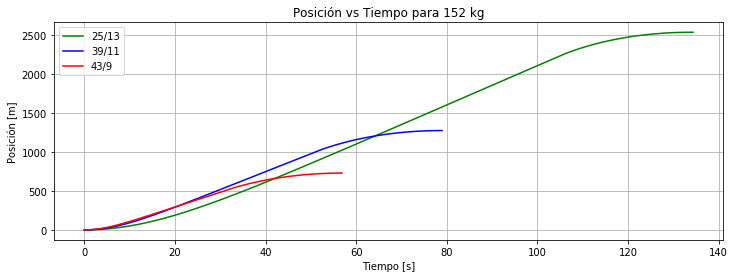

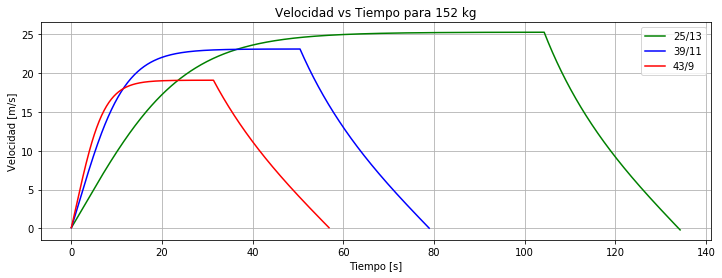

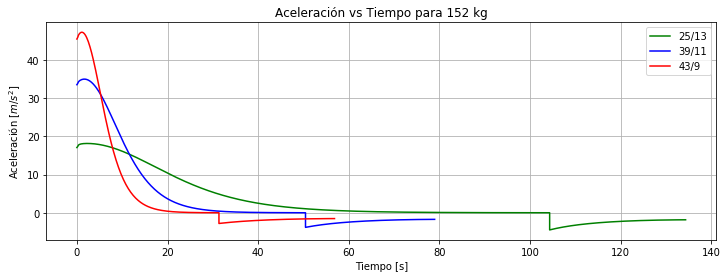

In [174]:
figure(figsize=(12,4))
plt.subplot(1,1,1)
plt.plot(resul1[0],resul1[1], '-g', label='25/13')
plt.plot(resul2[0],resul2[1], '-b', label='39/11')
plt.plot(resul3[0],resul3[1], '-r', label='43/9')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición [m]')
plt.title('Posición vs Tiempo para 152 kg')
plt.grid()
plt.legend(loc='best')
plt.show()

figure(figsize=(12,4))
plt.subplot(1,1,1)
plt.plot(resul1[0],resul1[2], '-g', label='25/13')
plt.plot(resul2[0],resul2[2], '-b', label='39/11')
plt.plot(resul3[0],resul3[2], '-r', label='43/9')
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad [m/s]')
plt.title('Velocidad vs Tiempo para 152 kg')
plt.grid()
plt.legend(loc='best')
plt.show()

figure(figsize=(12,4))
plt.subplot(1,1,1)
plt.plot(resul1[0],resul1[3], '-g', label='25/13')
plt.plot(resul2[0],resul2[3], '-b', label='39/11')
plt.plot(resul3[0],resul3[3], '-r', label='43/9')
plt.xlabel('Tiempo [s]')
plt.ylabel('Aceleración [$m/s^2$]')
plt.title('Aceleración vs Tiempo para 152 kg')
plt.grid()
plt.legend(loc='best')
plt.show()

##### Para la masa de 200 kg  se tienen los siguientes resultados con las diferentes relaciones de transmisión:

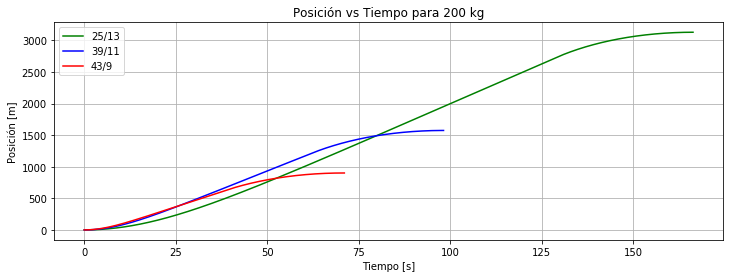

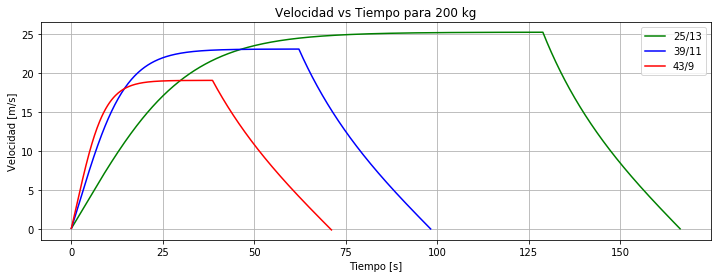

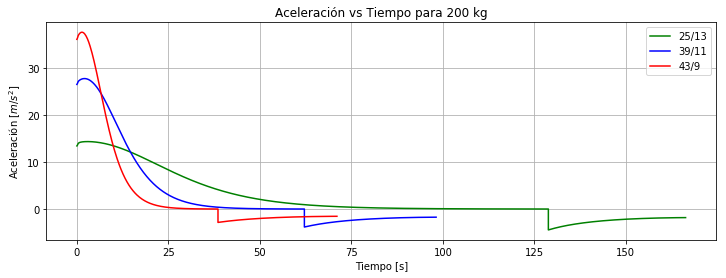

In [175]:
figure(figsize=(12,4))
plt.subplot(1,1,1)
plt.plot(resul4[0],resul4[1], '-g', label='25/13')
plt.plot(resul5[0],resul5[1], '-b', label='39/11')
plt.plot(resul6[0],resul6[1], '-r', label='43/9')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición [m]')
plt.title('Posición vs Tiempo para 200 kg')
plt.grid()
plt.legend(loc='best')
plt.show()

figure(figsize=(12,4))
plt.subplot(1,1,1)
plt.plot(resul4[0],resul4[2], '-g', label='25/13')
plt.plot(resul5[0],resul5[2], '-b', label='39/11')
plt.plot(resul6[0],resul6[2], '-r', label='43/9')
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad [m/s]')
plt.title('Velocidad vs Tiempo para 200 kg')
plt.grid()
plt.legend(loc='best')
plt.show()

figure(figsize=(12,4))
plt.subplot(1,1,1)
plt.plot(resul4[0],resul4[3], '-g', label='25/13')
plt.plot(resul5[0],resul5[3], '-b', label='39/11')
plt.plot(resul6[0],resul6[3], '-r', label='43/9')
plt.xlabel('Tiempo [s]')
plt.ylabel('Aceleración [$m/s^2$]')
plt.title('Aceleración vs Tiempo para 200 kg')
plt.grid()
plt.legend(loc='best')
plt.show()

##### Para la masa de 250 kg  se tienen los siguientes resultados con las diferentes relaciones de transmisión:

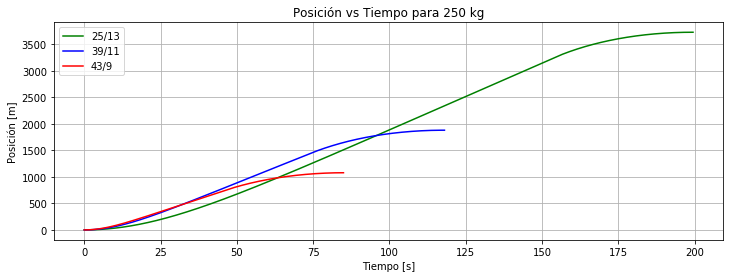

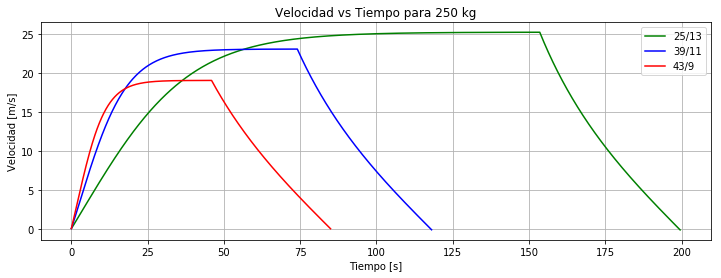

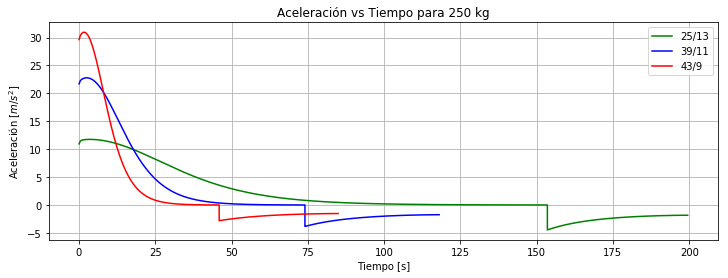

In [176]:
figure(figsize=(12,4))
plt.subplot(1,1,1)
plt.plot(resul7[0],resul7[1], '-g', label='25/13')
plt.plot(resul8[0],resul8[1], '-b', label='39/11')
plt.plot(resul9[0],resul9[1], '-r', label='43/9')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición [m]')
plt.title('Posición vs Tiempo para 250 kg')
plt.grid()
plt.legend(loc='best')
plt.show()

figure(figsize=(12,4))
plt.subplot(1,1,1)
plt.plot(resul7[0],resul7[2], '-g', label='25/13')
plt.plot(resul8[0],resul8[2], '-b', label='39/11')
plt.plot(resul9[0],resul9[2], '-r', label='43/9')
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad [m/s]')
plt.title('Velocidad vs Tiempo para 250 kg')
plt.grid()
plt.legend(loc='best')
plt.show()

figure(figsize=(12,4))
plt.subplot(1,1,1)
plt.plot(resul7[0],resul7[3], '-g', label='25/13')
plt.plot(resul8[0],resul8[3], '-b', label='39/11')
plt.plot(resul9[0],resul9[3], '-r', label='43/9')
plt.xlabel('Tiempo [s]')
plt.ylabel('Aceleración [$m/s^2$]')
plt.title('Aceleración vs Tiempo para 250 kg')
plt.grid()
plt.legend(loc='best')
plt.show()

## Conclusiones

De las gráficas obtenidas se pueden obtener las siguientes conclusiones:

- El comportamiento del vehículo en la predicción es el esperado, ya que las relaciones de transmisión implican los cambios esperados en la posición, velocidad y aceleración del Kart. Ejemplo de lo anterior es la realción baja (25/13) con la cual se obtienen los mayores desplazamientos en el tiempo con una aceleración menor, lo que implica que se alcancza la velocidad máxima en un mayor tiempo. 
- Como el fin del Kart es tener un desempeño competitivo la relación de transmisión optima es la media (39/11) con la cual se obtiene la velocidad máxima cercana a la de la realción de baja en un tiempo considerablemente menor. El tiempo de frenado de esta relación es menor al de baja, además acelera en proporciones cercanas a las de la relación de alta. Así pues, la realción intermedia ofrece un comportamiento adecuado para un vehículo que debe estar frenando y girando en las curvas. 
- Entre menor sea el peso del Kart  se alcanza la velocidad máxima en un periodo de tiempo más corto. Esto implica que la alternativa de los 152 kg es mejor que las de mayor masa. La ventaja del Kart más pesado (250 kg) es que se tiene una mayor distancia recorrida en el proceso de aceleración a velocidad máxima y frenado. 